<a href="https://colab.research.google.com/github/DSrahulsah06/One-Fourth-Labs-/blob/master/Task_3_One_Fourth_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing pakages
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## IMPORTING TRAINING DATA AND TEST DATA

In [0]:
TRAIN_DATA = pd.read_csv('gdrive/My Drive/Colab Notebooks/One Fourth Labs/characters-digits-train.csv',header=None)
TEST_DATA = pd.read_csv('gdrive/My Drive/Colab Notebooks/One Fourth Labs/characters-digits-test.csv',header=None)

In [0]:
#Taking independent variables in x and dependent variables in y
x = TRAIN_DATA.iloc[:,1:].values
y = TRAIN_DATA.iloc[:,0].values

In [6]:
x.shape

(112800, 784)

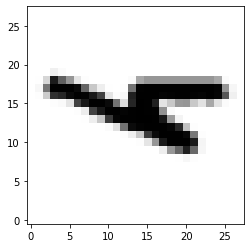

In [7]:
plt.imshow(x[5].reshape(28,28),cmap = 'Greys',origin="lower")

In [0]:
#Reshaping the array to 4-dims so that it can work with Keras API
TRAIN_x = x.reshape(x.shape[0],28,28,1)
input_shape = (28,28,1)

In [0]:
#coverting the data into an array
TRAIN_x = np.array(TRAIN_x)

In [0]:
#Making sure that the values are float so the we can get decimal points after division
TRAIN_X = TRAIN_x.astype('float32')

In [11]:
#Normalizing in the RGB codes by dividing it to the max RGB value
TRAIN_X/=255
print('TRAIN_X shape:', TRAIN_X.shape)
print('Number of images in x_train', x.shape[0])

TRAIN_X shape: (112800, 28, 28, 1)
Number of images in x_train 112800


In [12]:
y_pan=pd.DataFrame(y)
y_pan[0].unique()

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
       40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
       16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21])

In [13]:
len(y_pan[0].unique())

47

In [14]:
#Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [15]:
#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(47,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#compile the model
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=TRAIN_X,y=y,epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





112800/112800 [==============================] - 73s 651us/step - loss: 0.9810 - acc: 0.7053
Epoch 2/10
112800/112800 [==============================] - 72s 638us/step - loss: 0.5889 - acc: 0.8070
Epoch 3/10
112800/112800 [==============================] - 73s 645us/step - loss: 0.5115 - acc: 0.8281
Epoch 4/10
112800/112800 [==============================] - 72s 640us/step - loss: 0.4666 - acc: 0.8395
Epoch 5/10
112800/112800 [==============================] - 71s 632us/step - loss: 0.4369 - acc: 0.8468
Epoch 6/10
112800/112800 [==============================] - 71s 632us/step - loss: 0.4114 - acc: 0.8554
Epoch 7/10
112800/112800 [==============================] - 71s 630us/step - loss: 0.3913 - acc: 0.8604
Epoch 8/10
112800/112800 [==============================] - 71s 634us/step - loss: 0.3756 - acc: 0.8640
Epoch 9/10
112800/112800 [==============================] - 71s 

## TEST DATA

In [17]:
TEST_DATA.head(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,...,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = TEST_DATA.iloc[:,1:].values
y = TEST_DATA.iloc[:,0].values

In [19]:
x.shape

(18800, 784)

In [0]:
#Reshaping the array to 4-dims so that it can work with Keras API
TEST_x = x.reshape(x.shape[0],28,28,1)
input_shape = (28,28,1)

In [0]:
TEST_x = np.array(TEST_x)

In [0]:
#Making sure that the values are float so the we can get decimal points after division
TEST_X = TEST_x.astype('float32')

In [23]:
#Normalizing in the RGB codes by dividing it to the max RGB value
TEST_X/=255
print('TEST_X shape:', TEST_X.shape)
print('Number of images in x_test', x.shape[0])

TEST_X shape: (18800, 28, 28, 1)
Number of images in x_test 18800


In [24]:
y_pan2=pd.DataFrame(y)
y_pan2[0].unique()

array([41, 39,  9, 26, 44, 33, 14, 11,  3, 12, 16,  7,  2, 27,  6, 28, 45,
       29,  8,  4, 35, 40, 37, 21, 43, 20,  1, 23,  5, 25, 31, 17, 34,  0,
       18, 36, 38, 19, 32, 13, 42, 24, 10, 46, 30, 15, 22])

In [25]:
#making prediction using the model created
y_pred = model.predict(TEST_X)
y_pred

array([[4.1764932e-07, 6.4387672e-07, 7.1692622e-05, ..., 1.8181771e-02,
        1.4846225e-11, 1.9485752e-08],
       [9.3472640e-14, 1.9181985e-12, 1.1983940e-13, ..., 2.3781080e-07,
        4.1524114e-08, 5.2155773e-08],
       [2.3498739e-10, 6.3474373e-12, 3.8907899e-08, ..., 1.4358255e-01,
        3.4625139e-12, 1.2124310e-15],
       ...,
       [3.2072283e-12, 5.9784198e-01, 6.4868047e-08, ..., 2.3790816e-08,
        1.9644494e-06, 4.6780001e-04],
       [2.8120712e-07, 1.5904755e-13, 2.6551917e-05, ..., 1.0232196e-02,
        6.3281520e-14, 2.2199321e-15],
       [3.4326542e-09, 1.6545931e-04, 1.7904489e-05, ..., 7.2245435e-05,
        5.1960560e-05, 9.2308197e-05]], dtype=float32)

In [26]:
#evaluating the model
model.evaluate(TEST_X,y)

18800/18800 [==============================] - 3s 166us/step


[0.48253348230047427, 0.8471276595744681]

In [27]:
y_pred[0]
max=np.argmax(y_pred[111])
max

40

16


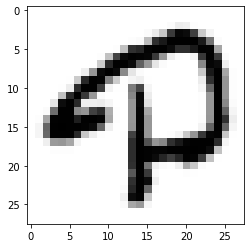

In [28]:
image_index = 10
plt.imshow(TEST_X[image_index].reshape(28,28),cmap = 'Greys')
pred = model.predict(TEST_X[image_index].reshape(1,28,28,1))
print(pred.argmax())